In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import relu
from torch.utils.data import DataLoader
from torchvision import datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_path = '/Users/douglaszou/Downloads/fer2013/train'
test_path = '/Users/douglaszou/Downloads/fer2013/test'

In [3]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

trainset = datasets.ImageFolder(root=train_path, transform=transform)
testset = datasets.ImageFolder(root=test_path, transform=transform)

batch_size = 16
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

sample = next(iter(train_loader))
image, label = sample

In [4]:
for index, data in enumerate(train_loader):
    images, labels = data
    print(f"{index} {images.shape}")

0 torch.Size([16, 3, 224, 224])
1 torch.Size([16, 3, 224, 224])
2 torch.Size([16, 3, 224, 224])
3 torch.Size([16, 3, 224, 224])
4 torch.Size([16, 3, 224, 224])
5 torch.Size([16, 3, 224, 224])
6 torch.Size([16, 3, 224, 224])
7 torch.Size([16, 3, 224, 224])
8 torch.Size([16, 3, 224, 224])
9 torch.Size([16, 3, 224, 224])
10 torch.Size([16, 3, 224, 224])
11 torch.Size([16, 3, 224, 224])
12 torch.Size([16, 3, 224, 224])
13 torch.Size([16, 3, 224, 224])
14 torch.Size([16, 3, 224, 224])
15 torch.Size([16, 3, 224, 224])
16 torch.Size([16, 3, 224, 224])
17 torch.Size([16, 3, 224, 224])
18 torch.Size([16, 3, 224, 224])
19 torch.Size([16, 3, 224, 224])
20 torch.Size([16, 3, 224, 224])
21 torch.Size([16, 3, 224, 224])
22 torch.Size([16, 3, 224, 224])
23 torch.Size([16, 3, 224, 224])
24 torch.Size([16, 3, 224, 224])
25 torch.Size([16, 3, 224, 224])
26 torch.Size([16, 3, 224, 224])
27 torch.Size([16, 3, 224, 224])
28 torch.Size([16, 3, 224, 224])
29 torch.Size([16, 3, 224, 224])
30 torch.Size([16, 3

### Stable Training: Larger batch sizes tend to provide more stable gradients, leading to smoother training.
### Efficiency: Utilizing the GPU more effectively by processing more images at once can be more efficient.
### Normalization Statistics: More samples in a batch can provide better statistics for batch normalization layers.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


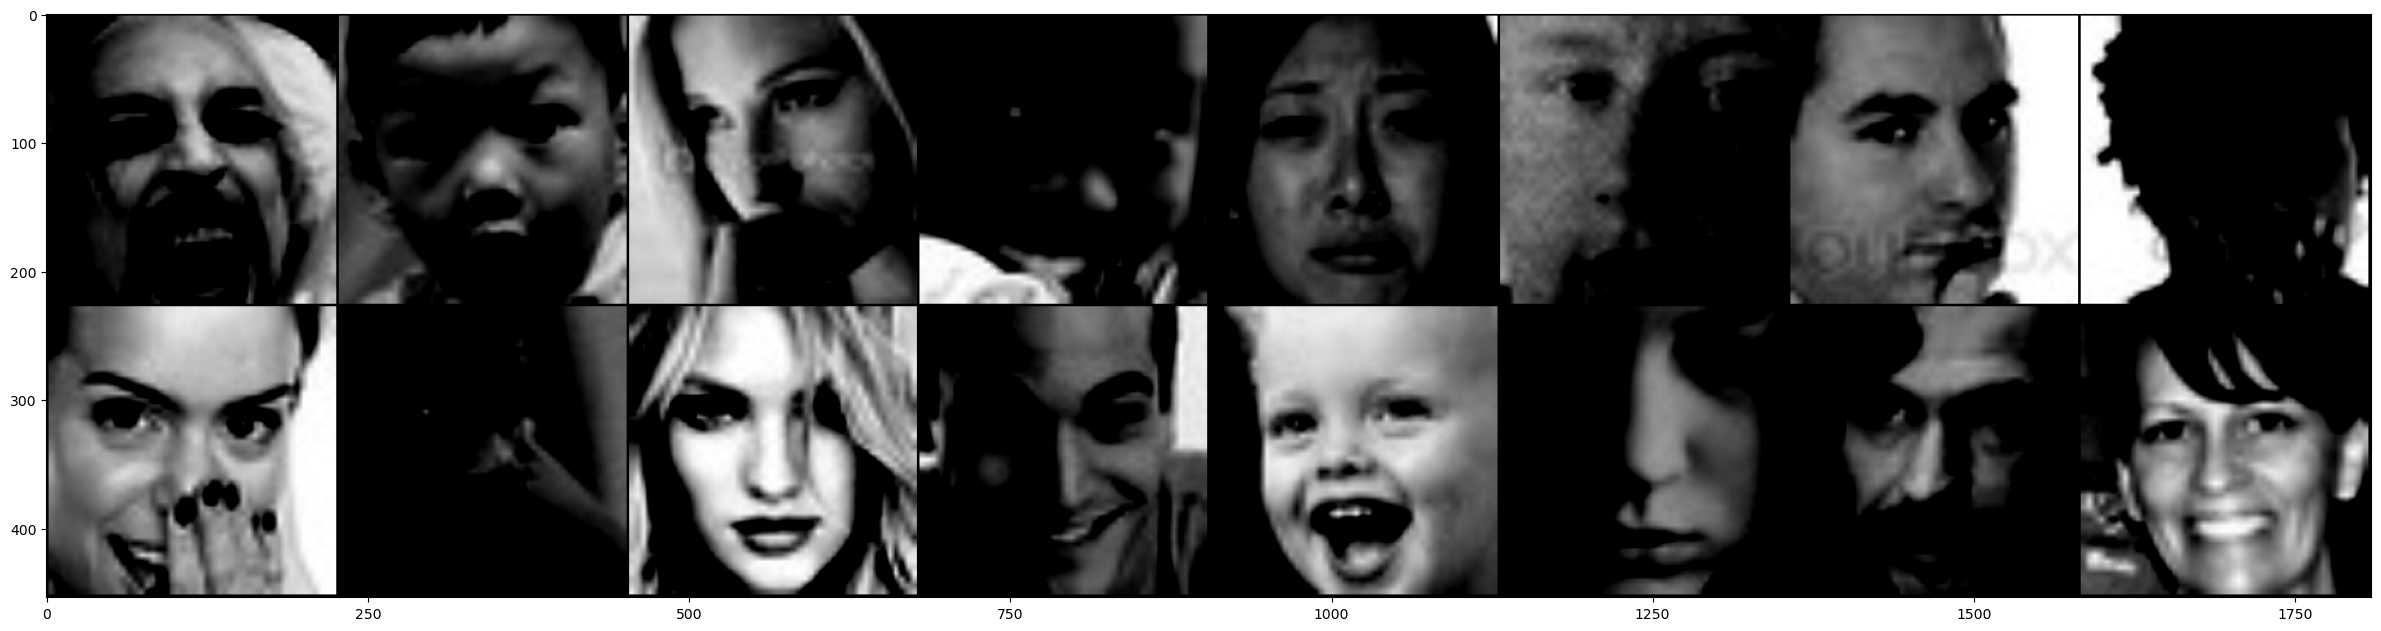

Fear | Neutral | Fear | Happy | Surprise | Sad | Fear | Fear | Neutral | Surprise | Sad | Happy | Happy | Surprise | Sad | Happy | 

In [6]:
grid = torchvision.utils.make_grid(image, nrow=8)
grid_np = grid.numpy()
grid_np = np.transpose(grid_np, (1,2,0))
plt.figure(figsize=(30,30))
plt.imshow(grid_np)
plt.show()

results_label = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# show the result labels
for lb in label:
    print(results_label[int(lb)], end=" | ")

### Pre-trained VGG model

In [8]:
# Load the pretrained VGG model
vgg = models.vgg16(pretrained=True)

# Freeze all the parameters in the pretrained model
for param in vgg.parameters():
    param.requires_grad = False

# Modify the classifier to match the number of classes (7 in your case)
vgg.classifier[6] = nn.Linear(vgg.classifier[6].in_features, len(results_label))

# Move the model to GPU if available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
vgg.to(device)

/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg.classifier[6].parameters(), lr=0.001)

In [10]:
# Learning rate and optimizer
learning_rate = 0.0001

# Weight decay for regularization
weight_decay = 1e-3

# optimizer with lr and weight decay
optimizer = optim.Adam(vgg.classifier[6].parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=7, gamma=0.1) 

# 43% accuracy step = 7, gamma = 0.1
# step = 5, gamma = 0.5

In [11]:
# num_epochs = 10
# tracked_losses = []

# for epoch in range(num_epochs):
#     vgg.train()
#     running_loss = 0.0

#     for index, data in enumerate(train_loader, 0):
#         images, labels = data
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = vgg(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#         if index % 2000 == 1999:  # Every 2000 batches
#             print(f'[{epoch + 1}, {index + 1:5d}] loss: {running_loss / 2000:.3f}')
#             tracked_losses.append(running_loss / 2000)  # Track average loss for 2000 batches
#             running_loss = 0.0  # Reset running_loss for next interval

# # Visualize batch losses
# plt.figure(figsize=(10,5))
# plt.plot(tracked_losses)
# plt.xlabel('Batch Interval')
# plt.ylabel('Loss')
# plt.title('Training Loss over Batches')
# plt.show()


In [12]:
num_epochs = 10
tracked_losses = []

for epoch in range(num_epochs):
    vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        tracked_losses.append(running_loss)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Step the scheduler
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct/total}%')

Epoch [1/10], Loss: 1.6707538016991363, Accuracy: 33.02797032289526%
Epoch [2/10], Loss: 1.586831447274572, Accuracy: 38.054268696227666%
Epoch [3/10], Loss: 1.5597734446645115, Accuracy: 39.44059354209482%
Epoch [4/10], Loss: 1.5469453854481159, Accuracy: 39.95611132397506%
Epoch [5/10], Loss: 1.5372694464447108, Accuracy: 40.46466264934341%
Epoch [6/10], Loss: 1.5280440099724155, Accuracy: 40.97669720296771%
Epoch [7/10], Loss: 1.5300550061348088, Accuracy: 40.8443345292417%
Epoch [8/10], Loss: 1.5135174621446552, Accuracy: 41.61761120206207%
Epoch [9/10], Loss: 1.5119744305491116, Accuracy: 41.729074506252395%
Epoch [10/10], Loss: 1.5118959380391581, Accuracy: 41.847504266954616%


In [26]:
vgg.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct/total}%')


Test Accuracy: 43.36862635831708%
